# Logistic Regression Practice
**Due: Mondy, 09/19/2022, 2:15 PM**

Welcome to your second assignment! You will build a logistic regression 
classifier to recognize cats in pictures. 


Contents:
1. Exercise 1.1 (5%)
2. Exercise 1.2 (10%)
3. Exercise 2.1 (10%)
4. Exercise 2.2 (30%)
5. Exercise 2.3.1 (20%)
6. Exercise 2.3.2 (10%)
7. Exercise 3 (15%)

**Instructions:**
- The code between the ### START CODE HERE ### and ### END CODE HERE ### comments will be graded. 
- Avoid using for-loops and while-loops, unless you are explicitly told to do so.

**After this assignment you will:**

- Be able to build the general architecture of a logistic regression model, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - optimizing parameters (gradient descent) 
- Get more used to vectorization using NumPY

## 1 - Overview of the Dataset ##

You are given a dataset containing:
- a training set of `m_train` images labeled as cat (y=1) or non-cat (y=0)
- a test set of `m_test` images labeled as cat or non-cat

Each image is of shape (width, height, 3) where 3 is for the 3 color channels (RGB). Load the data by running the following code.

In [6]:
# Import packages
import numpy as np
from utils import load_dataset
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data (cat/non-cat)
train_set_X, train_set_y, test_set_X, test_set_y, classes = load_dataset()
print (f"train_set_X shape: {train_set_X.shape}")
print (f"train_set_y shape: {train_set_y.shape}")
print (f"test_set_X shape: {test_set_X.shape}")
print (f"test_set_y shape: {test_set_y.shape}")


train_set_X shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_X shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


`train_set_X` and `test_set_X` contains images represented in numpy arrays. You can visualize an example by running the following code. Feel free to change the `index` value and re-run to see other images. 

y = 1, it's a cat picture


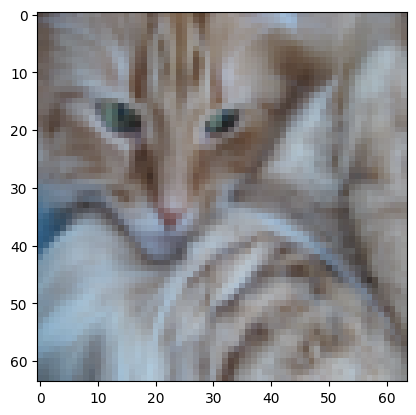

In [7]:
# Example of a picture
index = 2  # feel free to change this number
plt.imshow(train_set_X[index])
print(f"y = {train_set_y[0, index]}, it's a {classes[train_set_y[0, index]].decode('utf-8')} picture")


**(5%) Exercise 1.1: Data Dimensions**

It is very common to have mismatched array dimensions in deep learning software development. So, first thing is always to make sure that you know the shapes of your data. 

Find the values for:
- `m_train` (number of training examples)
- `m_test` (number of test examples)
- `image_size` (width, height, color_channels)

In [8]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_X.shape[0]
m_test = test_set_X.shape[0]
image_size = (test_set_X.shape[1], test_set_X.shape[2], test_set_X.shape[3])
### END CODE HERE ###

print (f"Number of training examples: m_train = {m_train}")
print (f"Number of testing examples: m_test = {m_test}")
print (f"Size of each picture: {image_size}")

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Size of each picture: (64, 64, 3)


**Expected Output:** 
> 
```console
Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Size of each picture: (64, 64, 3)
```

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.
Before we perform the forward pass of logistic regression, reshape every image into a `(1, width*height*color_channels)` arrary or a row vector. 
So that, our training (and test) dataset is a numpy-array/matrix with `m_train` (`m_test`) rows, where each row represents a flattened image. 
It is convenient to represent the value of a pixel using a float number within range of [0, 1] instead of using an integer in between [0, 255].
Divided each integer pixel value by 255 is usually applied to standardize a image dataset. 

**(10%) Exercise 1.2: Data Preprocessing**

Reshape and standardize the datasets:
- flatten the dataset into a numpy array with shape `(m, width*height*color_channels)`
- standardize the dataset to convert pixels to float numbers and limit each pixel value between 0 and 1.

In [9]:
### START CODE HERE ### (≈ 4 lines of code)
# flatten images
from re import M
import math

train_set_X_flatten = np.reshape(train_set_X, (m_train, math.prod(image_size)))
test_set_X_flatten = np.reshape(test_set_X, (m_test, math.prod(image_size)))
train_set_y = np.reshape(train_set_y, (m_train, 1))
test_set_y = np.reshape(test_set_y, (m_test, 1))
# standardize
train_set_X = train_set_X_flatten / 255
test_set_X = test_set_X_flatten / 255
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_X_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_X_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
#print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (209, 12288)
train_set_y shape: (209, 1)
test_set_x_flatten shape: (50, 12288)
test_set_y shape: (50, 1)


**Expected Output**: 
>
```console
train_set_x_flatten shape: (209, 12288)
train_set_y shape: (209, 1)
test_set_x_flatten shape: (50, 12288)
test_set_y shape: (50, 1)
```

## 2 - General Architecture of Logistic Regression algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images. We will build a Logistic Regression model to do this job.

Refer to the 10th slide from [class materials](https://linzhanguca.github.io/_docs/applied_deep_learning-2022/0831/logistic_regression_p1.pdf) for the Mathematical expressions of the algorithm.


We need a few steps to train our logistic regression model:
1. Initialize the model's parameters (weights and bias)
2. Calculate cost (forward propagation)
3. Calculate gradient (backward propagation)
4. Update parameters
5. Repeat step 2 to 4

### 2.1 - Initialize parameters
Parameters in a logistic regression model are a weight vector and a bias scalar. 
the dimension of the weight vector is determined by the numbers of features in data.
It is OK to initialize all the parameters at `0.` 

**(10%) Exercise 2.1:** Zero Initialization

Create a function to:
- initialize weight vector to be a zero row vector
- initialize bias to be 0.

In [10]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (1, dim) for w and initializes b to 0.
    
    Argument:
        dim -- dimension of the weight vector
    
    Returns:
        w -- initialized vector of shape (1, m)
        b -- initialized scalar: 0
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((1, dim))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (1, dim))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

# test
dim = 2
w, b = initialize_with_zeros(dim)
print (f"w = {w}")
print (f"b = {b}")

w = [[0. 0.]]
b = 0


**Expected Output**: 

>
```console
w = [[0. 0.]]
b = 0
```

### 2.2 - Forward and Backward Propagation

Compute cost of $m$ examples in the forward propagation. Compute gradient in the backward propagation
Refer to the 11th slide from [logistic regression: part1](https://linzhanguca.github.io/_docs/applied_deep_learning-2022/0831/logistic_regression_p1.pdf) for the forward propagation.
Refer to the 9th slide from [logistic regression: part2](https://linzhanguca.github.io/_docs/applied_deep_learning-2022/0907/lr_p2.pdf) for the backward propagation.

**Note: cross entropy loss function is recommended to calculate the cost:**
$J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(\hat{y}^{(i)})+(1-y^{(i)})\log(1-\hat{y}^{(i)}))$

**(30%) Exercise 2.2:** Implement forward and backward propagation
- finish a helper function: `sigmoid()`
- finish `propagate()` function to compute cost and gradient

In [11]:
from cmath import log


def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
        z -- A scalar or numpy array of any size.

    Return:
        s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return s
    
def propagate(w, b, X, y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
        w -- weights, a row vector
        b -- bias, a scalar
        X -- data, a matrix
        y -- label/ground truth, a column vector (containing 0 if non-cat, 1 if cat)

    Return:
        grads -- a dictionary stores gradients
            dw -- gradient of the cost with respect to w
            db -- gradient of the cost with respect to b
        cost -- a scalar of negative log-likelihood cost for logistic regression
        
    """
    
    m = X.shape[0]
    
    ### START CODE HERE ### (≈ 4 lines of code)
    # forward propagation (calculate cost)
    yhat = sigmoid(np.dot(X, w.T) + b)
    cost = (1/m) * np.sum(-(y * np.log(yhat) + (1 - y) * np.log(1 - yhat)))
    # backward propagation (calculate gradient)
    dw = (1/m) * np.dot((yhat - y).T, X)
    db = (1/m) * np.sum(yhat - y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw': dw,
             'db': db}
    
    return grads, cost

# test
w, b, X, y = np.array([[1.,2.]]), 2., np.array([[1., 3.], [2., 4.], [-1., -3.2]]), np.array([[1], [0], [1]])
grads, cost = propagate(w, b, X, y)
print (f"dw = {grads['dw']}")
print (f"db = {grads['db']}")
print (f"cost = {cost}")

dw = [[0.99845601 2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


**Expected Output**:
>
```console
dw = [[0.99845601 2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553
```

### 2.3 - Optimization
Update the parameters using gradient descent algorithm.
The goal is to learn $\mathbf{w}$ and $b$ by minimizing the cost function $J$.
You can refer to the last slide from [logistic regression: part2](https://linzhanguca.github.io/_docs/applied_deep_learning-2022/0907/lr_p2.pdf).

**(20%) Exercise 2.3.1:** Gradient descent optimization.
Finish the following function to compute cost, gradient and one-step update of the parameters

In [12]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
        w -- weights, a row vector
        b -- bias, a scalar
        X -- data, a matrix
        y -- label/ground truth, a column vector
        num_iterations -- number of iterations of the optimization loop
        learning_rate -- learning rate of the gradient descent update rule
        print_cost -- True to print the loss every 100 steps
    
    Returns:
        params -- a dictionary stores parameters
            w -- gradient of the cost with respect to w
            b -- gradient of the cost with respect to b
        grads -- a dictionary stores gradients
        cost -- a scalar of negative log-likelihood cost for logistic regression                
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        ### START CODE HERE ### (≈ 1-4 lines of code)
        # cost and gradient calculation 
        grads, cost = propagate(w, b, X, y)
        dw = grads["dw"]
        db = grads["db"]        
        # update params 
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        ### END CODE HERE ###
        
        # record costs
        if not (i+1) % 100:
            costs.append(cost)        
        # Print the cost every 100 training iterations
        if print_cost and not (i+1) % 100:
            print (f"Cost after iteration {i+1}: {cost}")
    
    params = {'w': w,
              'b': b}
    
    grads = {'dw': dw,
             'db': db}
    
    return params, grads, costs

# test
params, grads, costs = optimize(w, b, X, y, num_iterations= 100, learning_rate = 0.009, print_cost = True)
print (f"w = {params['w']}")
print (f"b = {params['b']}")
print (f"dw = {grads['dw']}")
print (f"db = {grads['db']}")

Cost after iteration 100: 1.0784313398164707
w = [[0.19033591 0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042 1.41625495]]
db = 0.21919450454067657


**Expected Output**: 
>
```console
Cost after iteration 100: 1.0784313398164709
w = [[0.19033591 0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042 1.41625495]]
db = 0.21919450454067657
```

**(10%) Exercise 2.3.2:** Prediction

It is time to use the learned $\mathbf{w}$ and $b$ to predict the labels for a dataset $\mathbf{X}$. Finish the `predict()` function. Set a threshold to categorize a $\hat{y}$ into either 1 (cat) or 0 (non-cat). 

In [13]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
        w -- weights, a row vector
        b -- bias, a scalar
        X -- data, a matrix
        
    Returns:
        pred -- a column vector contains all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[0]
    pred = np.zeros((m,1))
    w = w.reshape(1, X.shape[1])
    
    ### START CODE HERE ### (≈ 2 line of code)
    yhat = sigmoid(np.dot(X, w.T) + b)
    pred = np.round(yhat)
    ### END CODE HERE ###
    assert(pred.shape == (m, 1))
    
    return pred

# test
w = np.array([[0.1124579, 0.23106775]])
b = -0.3
X = np.array([[1., 1.2], [-1.1, 2.], [-3.2, 0.1]])
print (f"predictions: \n{predict(w, b, X)}")

predictions: 
[[1.]
 [1.]
 [0.]]


**Expected Output**: 
>
```console
predictions: 
[[1.]
 [1.]
 [0.]]
```

## 3 - Show Me the Cats ##

We will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous sections), in the right order.

**(15%) Exercise 3:** Train a logistic regression classifier

Finish the `train()` function

In [14]:
def train(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
     """
     Builds the logistic regression model by calling the function you've implemented previously

     Arguments:
          X_train -- training dataset, a matrix
          y_train -- training labels, a column vector
          X_test -- test dataset, a matrix
          Y_test -- test labels, a column vector
          num_iterations -- number of iterations to optimize the parameters
          learning_rate -- learning rate used in the update rule of optimize()
          print_cost -- Set to true to print the cost every 100 iterations

     Returns:
          model -- dictionary containing information about the model.
     """
    
     ### START CODE HERE ###

     # initialize parameters with zeros (≈ 1 line of code)
     w, b = initialize_with_zeros(X_train.shape[1])
     print("w:", w)
     print("\nb:", b)
     # Gradient descent (≈ 1 line of code)
     grads, cost = propagate(w, b, X_train, y_train)
     print("\ngrads: ", grads)
     print("\ncost: ", cost)
     # Retrieve parameters w and b from dictionary "parameters"
     params, grads, cost = optimize(w, b, X_train, y_train, num_iterations, learning_rate, print_cost = True)
     print("\nparams: ", params)
     print("\ngrads: ", grads)
     print("\ncost: ", cost)
     # Predict test/train set examples (≈ 2 lines of code)
     print(X_test.shape)
     pred_test = predict(params['w'], params['b'], X_test)
     pred_train = predict(params['w'], params['b'], X_train)

     print("\npred_test: ", pred_test)
     print("\npred_train: ", pred_train)
    
     ### END CODE HERE ###

     # Print train/test Errors
     print(f"train accuracy: {100 - np.mean(np.abs(pred_train - y_train)) * 100} %")
     print(f"test accuracy: {100 - np.mean(np.abs(pred_test - y_test)) * 100} %")


     model = {"costs": costs,
          "Y_prediction_test": pred_test, 
          "Y_prediction_train" : pred_train, 
          "w" : w, 
          "b" : b,
          "learning_rate" : learning_rate,
          "num_iterations": num_iterations}

     return model

# test
model = train(train_set_X, train_set_y, test_set_X, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

w: [[0. 0. 0. ... 0. 0. 0.]]

b: 0

grads:  {'dw': array([[0.04720893, 0.06299841, 0.04923539, ..., 0.05074585, 0.0621259 ,
        0.03245145]]), 'db': 0.15550239234449761}

cost:  0.6931471805599453
Cost after iteration 100: 0.6448978829531701
Cost after iteration 200: 0.4848936141484849
Cost after iteration 300: 0.37776149521638075
Cost after iteration 400: 0.3317754055523588
Cost after iteration 500: 0.3035286720260553
Cost after iteration 600: 0.28009427757967503
Cost after iteration 700: 0.2602258475628189
Cost after iteration 800: 0.24310018399838854
Cost after iteration 900: 0.22814432769465365
Cost after iteration 1000: 0.2149437706968248
Cost after iteration 1100: 0.2031892821910463
Cost after iteration 1200: 0.19264428020365887
Cost after iteration 1300: 0.18312389153132902
Cost after iteration 1400: 0.17448101386887016
Cost after iteration 1500: 0.16659675354042905
Cost after iteration 1600: 0.15937369509858537
Cost after iteration 1700: 0.15273105849939206
Cost after itera

**Expected Output**: 
>
```console
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %
```

Training accuracy is close to 100%. This is a good sanity check: your model is working and has high enough capacity to fit the training data.Test accuracy is 70%. The model is clearly overfitting the training data. It is actually not too bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. 


ground truth = 0, you predicted that it is a "cat" picture.


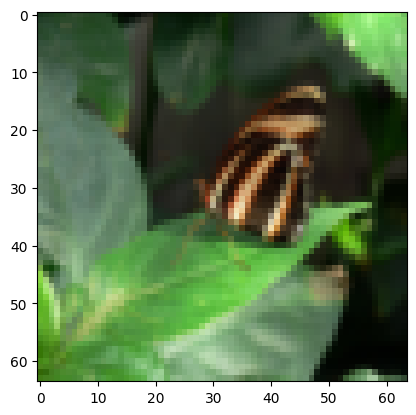

In [15]:
# Example of a picture that was wrongly classified.
index = 5
plt.imshow(test_set_X[index].reshape(image_size))
# classes
print ("ground truth = " + str(test_set_y[index, 0]) + ", you predicted that it is a \"" + classes[int(model["Y_prediction_test"][index,0])].decode("utf-8") +  "\" picture.")

We can also plot the learning curve which can be expressed with the costs.

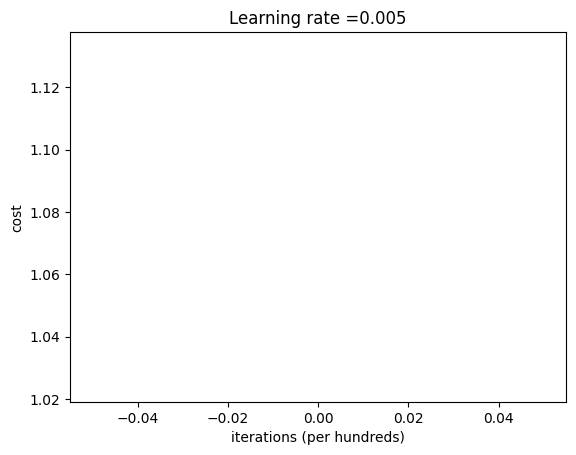

In [16]:
# Plot learning curve (with costs)
costs = np.squeeze(model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(model["learning_rate"]))
plt.show()

> You can also monitor costs for test dataset. Try to plot both curves in same figure.

# Congratulations on finishing this assignment. 
You can use your own image to test the model. 
1. Upload an image file into the `images/` folder.
2. modify the `file` variable in the following code block according to your needs.
3. Run following code block.
> A bunch of images are pre-uploaded.

Your model predicts a non-cat picture


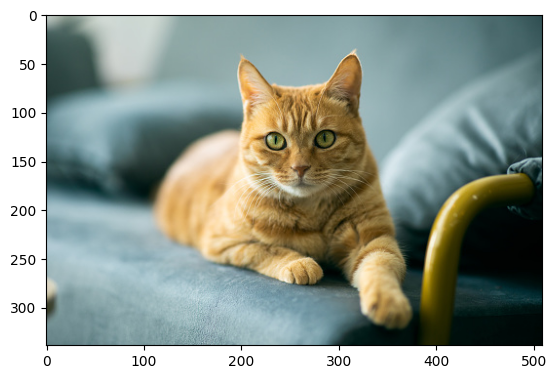

In [24]:
import matplotlib.pyplot as plt

file = "cat2.jpg"   # change this to the name of your image file 
# preprocess the image to fit your algorithm.
fname = "images/" + file
im = plt.imread(fname)
# im = plt.imread(fname)
imresize = np.resize(im, image_size)
imfloat = imresize/255.
imflatten = imfloat.reshape(1,-1)
my_predicted_image = predict(model["w"], model["b"], imflatten)
plt.imshow(im)
print(f"Your model predicts a {classes[int(np.squeeze(my_predicted_image))].decode('utf-8')} picture")